In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
#date_time_name = 'data/grad_update_and_tree/060120261637'
date_time_name = 'data/coord_update_and_tree/070120261445'

In [3]:

coord_update_array = np.load(date_time_name + '_coord.npy')
grad_update_array = np.load(date_time_name + '_grad.npy')
edges_set = np.load(date_time_name + '__edges.npy')




In [4]:

delta = 1/10  #Value of delta. Theoretical max is delta = 1/924
C_val = .5 #C_{2.1} and C_{2.2}
c_val = 0.25 #c_{2.1} and c_{2.2}
C_upperTail = 4/5 * (9 * C_val**2 / (2*c_val) + 2* C_val)**2 #C_{2.7}
c_lowerTail = 1 - 2*c_val/(3*C_val) #c_{2.8}

n_leaves = 10
num_edges = n_leaves * 2 - 1
n_trees = 25
n_samples = 200000
errors_coord_update =[]
errors_gradient_ascent = []
error_empirical_data = []
edge_sets, vertex_sets, roots = [],[],[]
epochs = 5
lr = 0.04#LR for Jan 7 was 0.04
warm_start = False

t = list(range(epochs*num_edges+1))
t1 = [1+k*num_edges for k in range(epochs+1)]

coord_update_mean = np.mean(coord_update_array,0)
coord_update_std = np.std(coord_update_array,0)
coord_update_max = np.max(coord_update_array, 0)
coord_update_min = np.min(coord_update_array, 0)

coord_update_upper = coord_update_mean + coord_update_std
coord_update_lower = coord_update_mean - coord_update_std

grad_update_mean = np.mean(grad_update_array,0)
grad_update_std = np.std(grad_update_array,0)
grad_update_max = np.max(grad_update_array, 0)
grad_update_min = np.min(grad_update_array, 0)

grad_update_upper = grad_update_mean + grad_update_std
grad_update_lower = grad_update_mean - grad_update_std








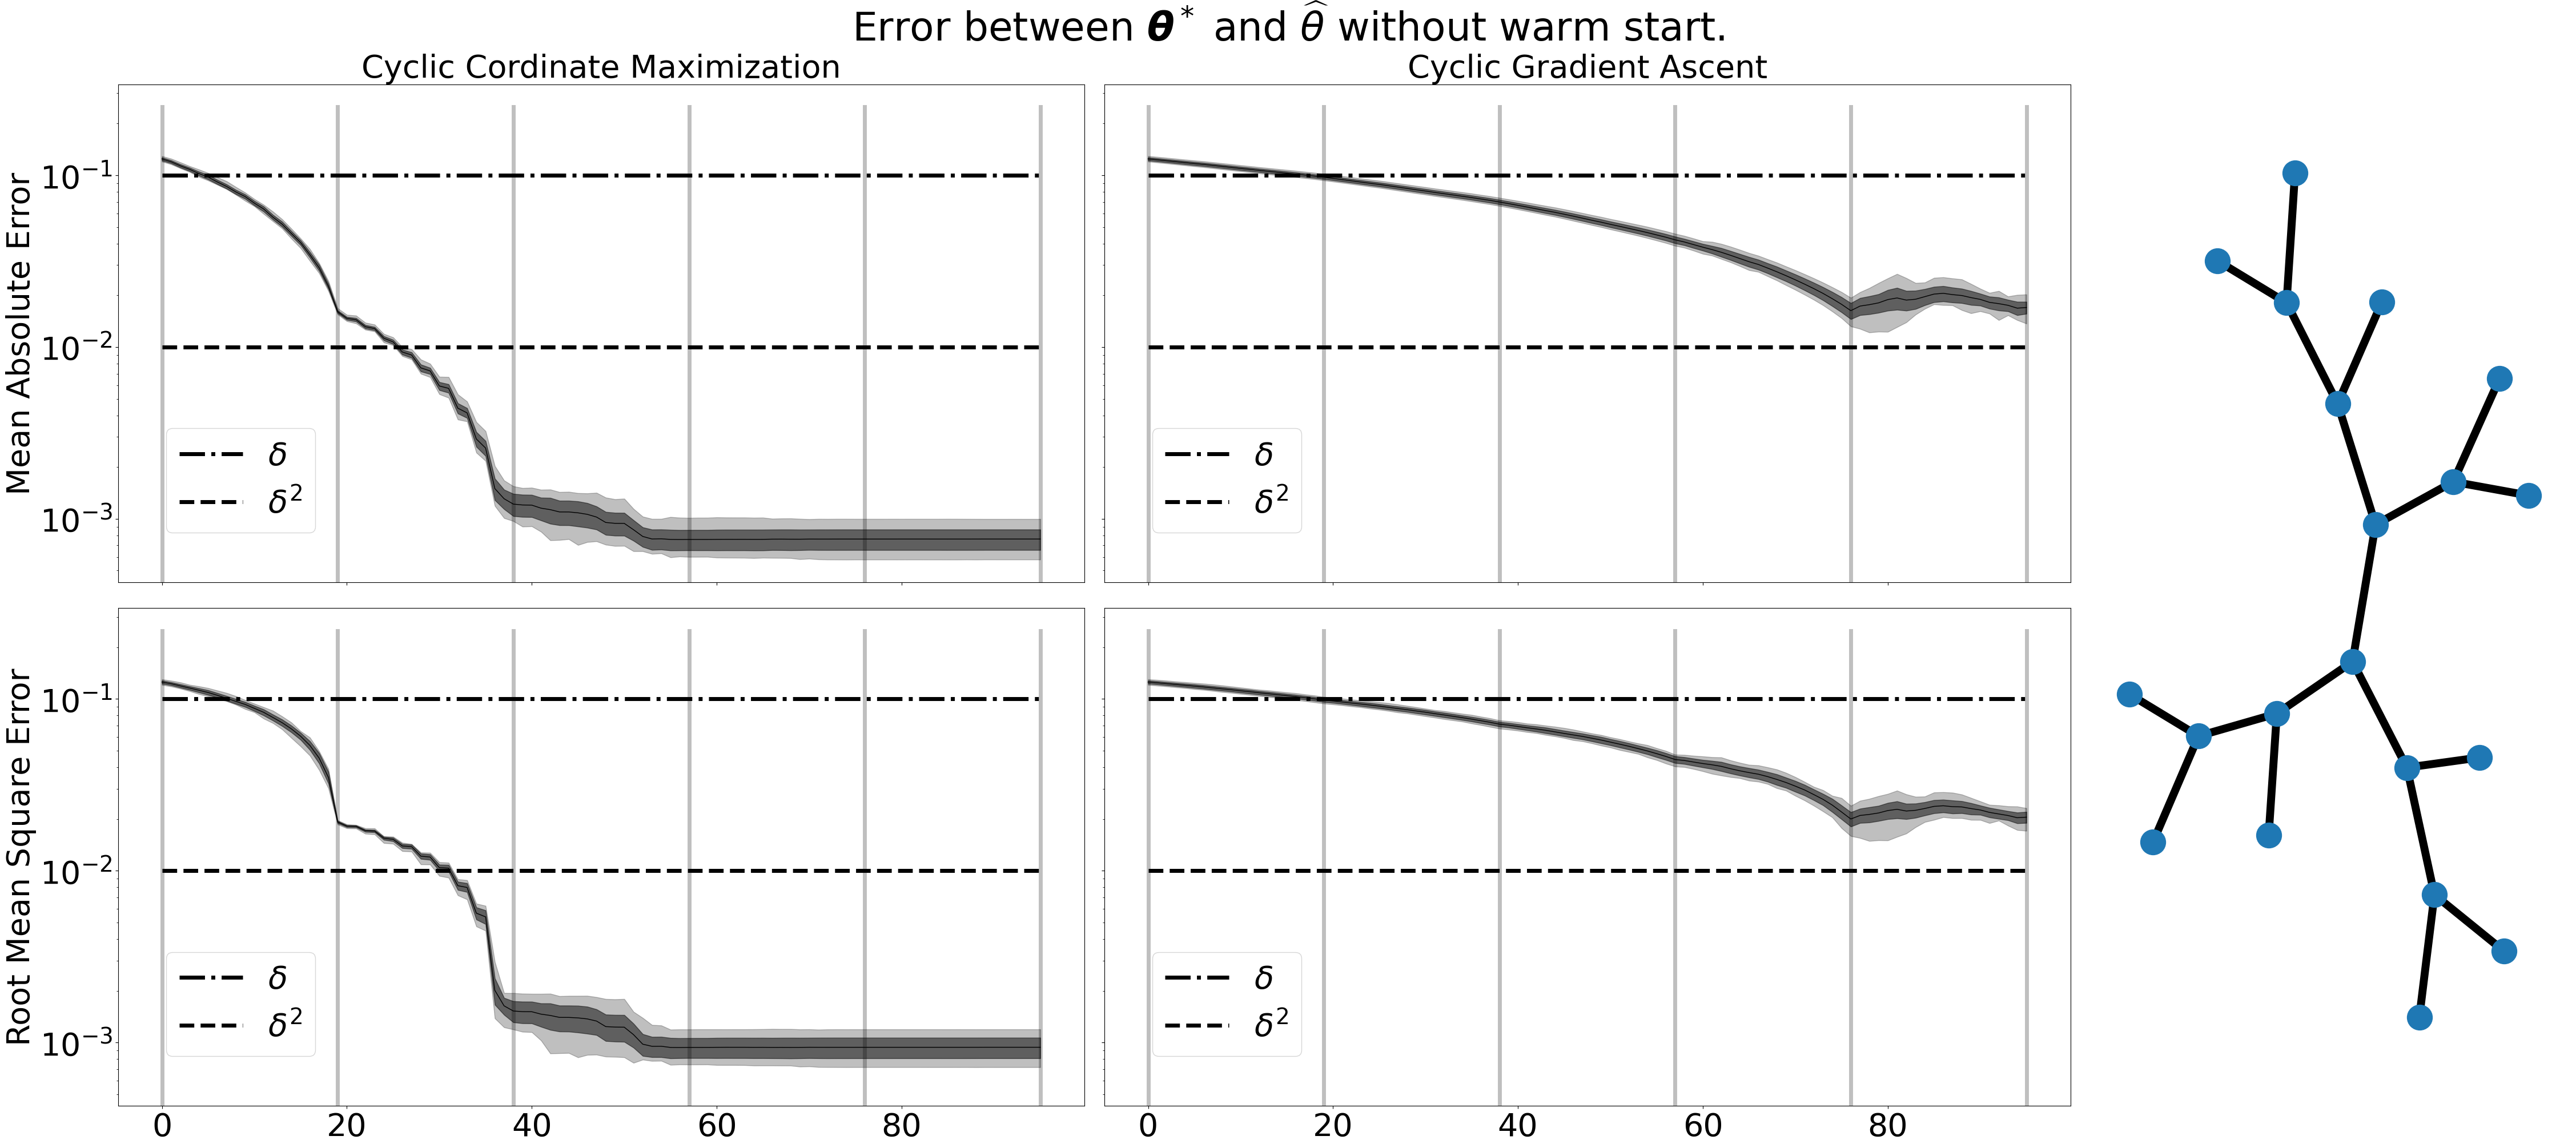

In [ ]:
fig, ax = plt.subplots(ncols = 3, nrows = 2,figsize = (45,20), width_ratios= [2,2,1],
                       constrained_layout=True, sharex=True, sharey = True)
gs = ax[0,-1].get_gridspec()
for a in ax[:,-1]:
    a.remove()
axbig = fig.add_subplot(gs[:,-1])



A = .25
alpha = .25
for i in range(2):
    for k in range(2):
        for j,s in enumerate(t1):
            ax[i,k].plot([s-1,s-1],[0,A], color = 'k', alpha=alpha, linewidth=5)        

linewidth = 1
m = min(np.min(coord_update_array), np.min(grad_update_array))
M = max(np.max(coord_update_array), np.max(grad_update_array))

#ax[0].set_title('Coordinate Maximization')
ax[0,0].set_ylabel('Mean Absolute Error',fontsize = 40)
ax[1,0].set_ylabel('Root Mean Square Error', fontsize = 40)
ax[0,0].fill_between(t, coord_update_max[0,:], coord_update_min[0,:], alpha = alpha, color = 'k')
ax[1,0].fill_between(t, coord_update_max[1,:], coord_update_min[1,:], alpha = alpha, color = 'k')
ax[0,0].fill_between(t, coord_update_upper[0,:], coord_update_lower[0,:], alpha = 2*alpha, color = 'k')
ax[1,0].fill_between(t, coord_update_upper[1,:], coord_update_lower[1,:], alpha = 2*alpha , color = 'k')
ax[0,0].plot(t, coord_update_mean[0,:], color = 'k', linewidth = linewidth, #label = 'MAE'
           )
ax[1,0].plot(t, coord_update_mean[1,:], color = 'k', linewidth = linewidth, #label = 'RMSE'
           )

ax[0,1].fill_between(t, grad_update_max[0,:], grad_update_min[0,:], alpha = alpha, color = 'k')
ax[1,1].fill_between(t, grad_update_max[1,:], grad_update_min[1,:], alpha = alpha, color = 'k')
ax[0,1].fill_between(t, grad_update_upper[0,:], grad_update_lower[0,:], alpha = 2*alpha, color = 'k')
ax[1,1].fill_between(t, grad_update_upper[1,:], grad_update_lower[1,:], alpha = 2*alpha , color = 'k')
ax[0,1].plot(t, grad_update_mean[0,:], color = 'k', linewidth = linewidth, #label = 'MAE'
           )
ax[1,1].plot(t, grad_update_mean[1,:], color = 'k', linewidth = linewidth, #label = 'RMSE'
           )

for i, (axis, col) in enumerate(zip(ax[0],['Cyclic Cordinate Maximization', 'Cyclic Gradient Ascent',0])):
    if i ==2:
        break
    axis.set_title(col, fontsize = '40')

for i in range(2):
    for j in range(2):
        ax[i,j].plot(t, [delta for _  in t],'k', ls = '-.', label = '$\\delta$',linewidth=5)
        ax[i,j].plot(t, [delta**2 for _  in t], 'k--',label = '$\\delta^2$',linewidth=5)
        ax[i,j].tick_params(axis='both', which='major', labelsize=40)
        ax[i,j].legend(loc = (.05,.1),fontsize = 40)
        ax[i,j].set_yscale('log')


plt.suptitle("Error between $\\boldsymbol{\\theta}^*$ and $\\widehat{\\boldsymbol{\\theta}}$ without warm start.", fontsize = 50)
edges = [tuple(e) for e in edges_set]
graph = nx.Graph(edges)
pos = nx.kamada_kawai_layout(graph)
ax[1,0] = nx.draw(graph, pos = pos, node_size=1000, width = 10)
plt.savefig(date_time_name + '_coord_update_error.png')

plt.show()

